# Gelquant example usage

In [1]:
from gelquant import gelquant
%matplotlib inline

### Import and crop gel images as desired.

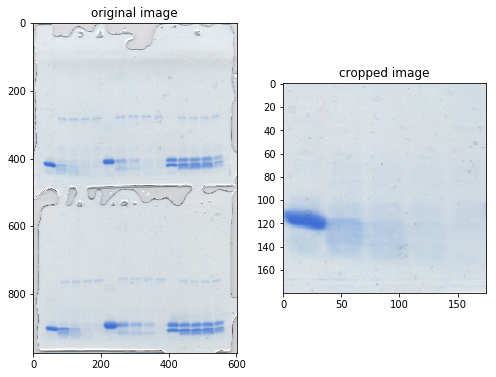

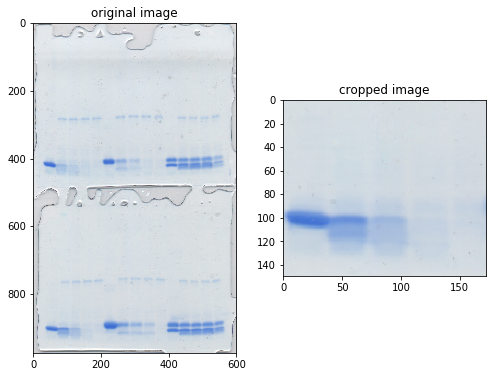

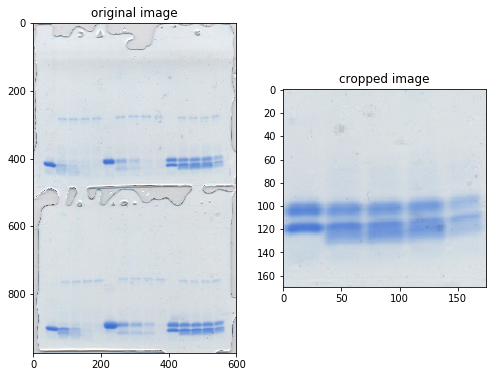

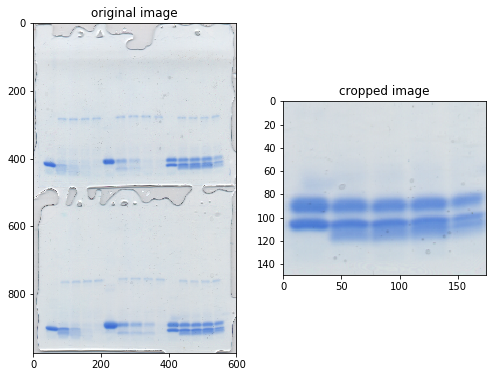

In [2]:
# The four numbers correspond to (x1,y1) and (x2,y2) points between which the gel gets cropped

a1 = gelquant.image_cropping("gel-example.png", 30, 300, 205, 480)

# You can process more than one replicate by simply repeating gelquant.image_cropping

a2 = gelquant.image_cropping("gel-example.png", 35, 800, 208, 950)
b1 = gelquant.image_cropping("gel-example.png", 390, 300, 565, 470)
b2 = gelquant.image_cropping("gel-example.png", 390, 800, 565, 950)

### Parse and set bounds on intensity plots, calculate areas

In [3]:
# The example dataset consists of 2 different proteins exposed to a protease
# for 0, 1, 2, 5, and 30 minutes.
# Provide the lane parser with the number of lanes and unique proteins per image - 
# in this example, 5 lanes and 1 protein.
# Finally, provide a baseline range for every lane - 
# these values correspond to the y values in the cropped images above.

data1, bounds1 = gelquant.lane_parser(a1, 5, 1, 0, 100)
data2, bounds2 = gelquant.lane_parser(a2, 5, 1, 0, 80)
data3, bounds3 = gelquant.lane_parser(b1, 5, 1, 0, 80)
data4, bounds4 = gelquant.lane_parser(b2, 5, 1, 0, 70)

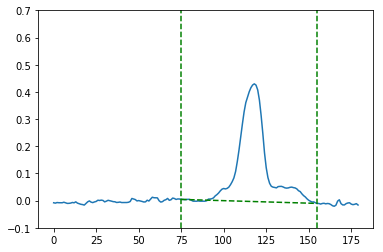

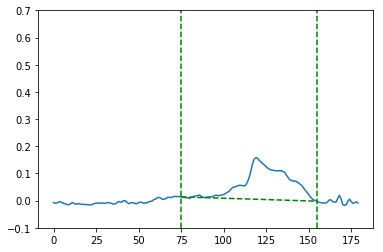

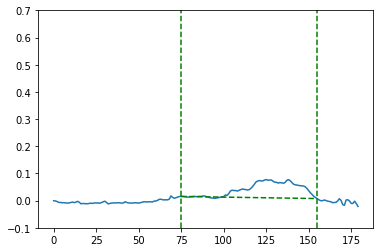

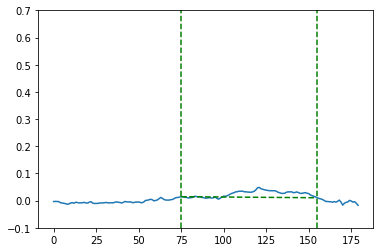

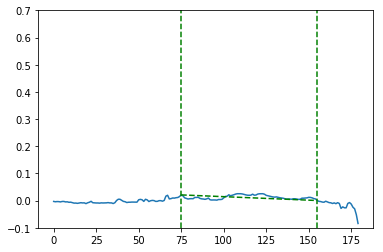

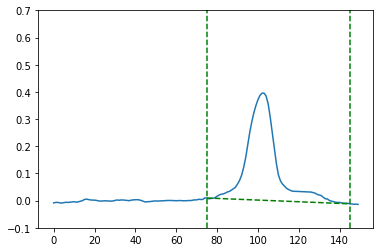

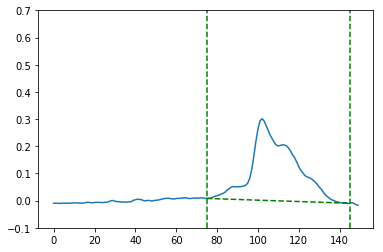

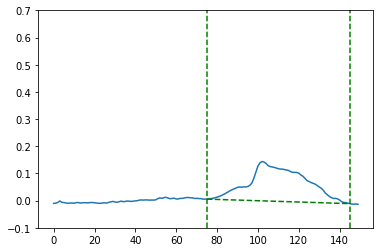

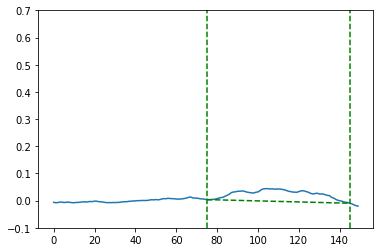

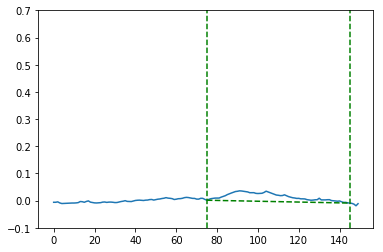

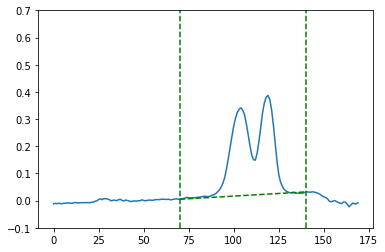

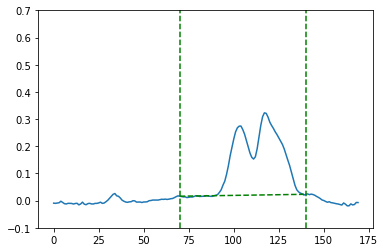

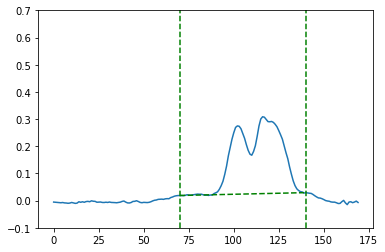

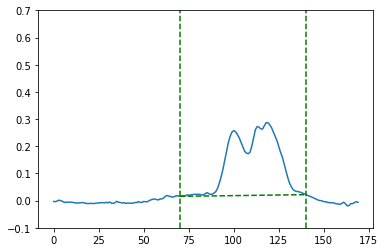

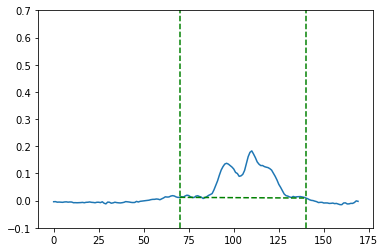

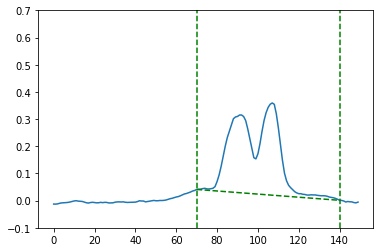

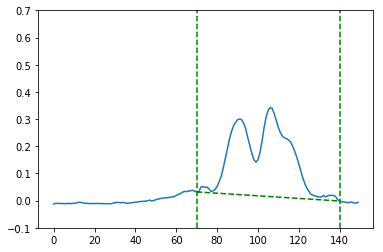

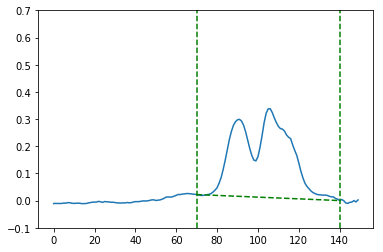

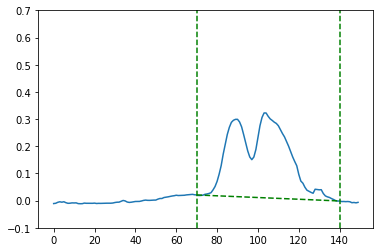

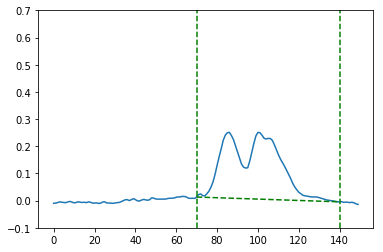

In [4]:
# You can use the bounds from above as an initial guess,
# but you can also set your own peak boundaries (strongly encouraged).
# plot_output allows for visual inspection of selected boundaries.
# area_integrator captures the peak areas as a percentage of 
# the first band in each experiment for comparison. 

bounds1 = [75, 155]
bounds2 = [75, 145]
bounds3 = [70, 140]
bounds4 = [70, 140]

percentages1 = gelquant.area_integrator(data1, bounds1, 1, plot_output=True)
percentages2 = gelquant.area_integrator(data2, bounds2, 1, plot_output=True)
percentages3 = gelquant.area_integrator(data3, bounds3, 1, plot_output=True)
percentages4 = gelquant.area_integrator(data4, bounds4, 1, plot_output=True)

### Plot summary data

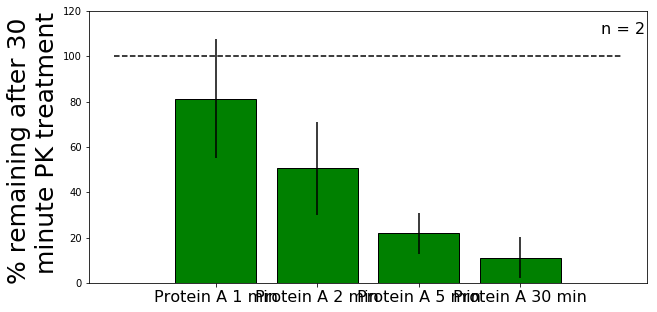

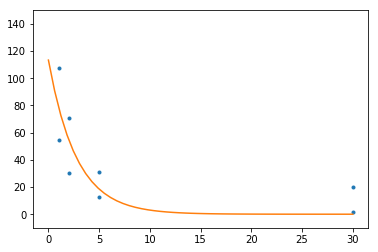

intercept = 113.3921 +/- 36.3378
k = 0.3625 +/- 0.1915 per min


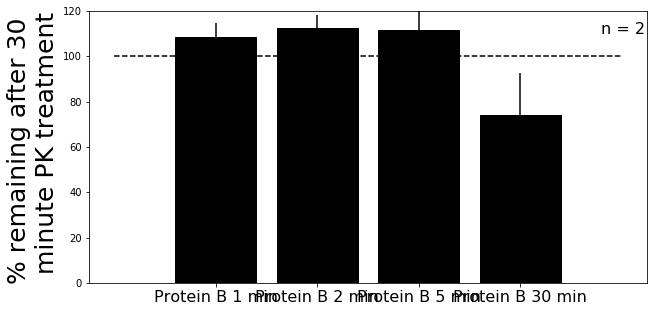

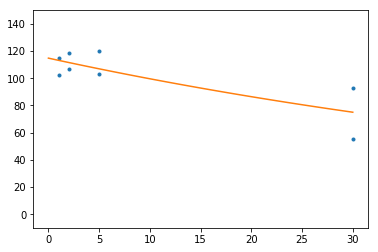

intercept = 114.8405 +/- 6.3501
k = 0.0142 +/- 0.0049 per min


In [6]:
# for replicates, such as the two we have in the example images, you can define the dataset as follows:

a_data = [percentages1, percentages2]
b_data = [percentages3, percentages4]

# specify labels, timepoints, and a list of colors for summary plots.
# The 0 time point is omitted automatically since the purpose of this dataset was 
# to quantify % protein remaining after protease treatment. 

timepoints = [1,2,5,30]
              
a_labels = ["Protein A 1 min", "Protein A 2 min", "Protein A 5 min", "Protein A 30 min"]
a_colorlist = ["green"]

b_labels = ["Protein B 1 min", "Protein B 2 min", "Protein B 5 min", "Protein B 30 min"]
b_colorlist = ["black"]

# pipe the datasets, labels, timepoints, and colorlist into summary plotter.
# An exponential decay fit has been included here as well, although in 
# this example the fit is rather poor. 

a_df, a_popt, a_perr = gelquant.summary_data(a_data, a_labels, timepoints, a_colorlist)
b_df, b_popt, b_perr = gelquant.summary_data(b_data, b_labels, timepoints, b_colorlist)

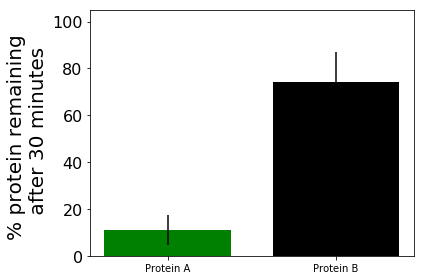

In [9]:
# For large batches of data, an "aggregator" function is included 
# that allows for rapid parsing and re-plotting of the data above,
# so you don't have to manually go through and re-plot specific time points of interest.

data_list = [a_df, b_df]

# column call selects the timepoint of interest - 
# you can manually inspect your dataframes to find the one you want. 

means, errors = gelquant.aggregator(data_list, column=-1)

# an aggregate plotter function allows for quick plotting and 
# customization of aggregate data plots, including
# optional figure output as a .png.

labels = ["Protein A", "Protein B"]
colorlist = ["green", "black"]
y_pos = [0,1]
ylabel = "% protein remaining \n after 30 minutes"
xlabel = ""
filename = "aggregate_data_example.png"

df = gelquant.aggregate_plotter(means, errors, labels, colorlist, y_pos, ylabel, xlabel, filename, savefig=True)